IMPORTING NECESSARY LIBRARIES

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

READING THE DATASET

In [25]:
df = pd.read_csv("/content/BTC-USD.csv")
df.head(10)

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   
5  2014-09-22  399.100006  406.915985  397.130005  402.152008  402.152008   
6  2014-09-23  402.092010  441.557007  396.196991  435.790985  435.790985   
7  2014-09-24  435.751007  436.112000  421.131989  423.204987  423.204987   
8  2014-09-25  423.156006  423.519989  409.467987  411.574005  411.574005   
9  2014-09-26  411.428986  414.937988  400.009003  404.424988  404.424988   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  
5  24127600  
6  45099500  
7  30627700  
8  26814400  
9  21460800

DATA EXPLORATION

In [26]:
df.describe()

Open          High           Low         Close     Adj Close  \
count   3228.000000   3228.000000   3228.000000   3228.000000   3228.000000   
mean   13664.725548  13997.728538  13300.725867  13672.568197  13672.568197   
std    16018.010041  16418.141665  15561.618968  16015.763332  16015.763332   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      762.625244    773.658493    750.296265    764.113251    764.113251   
50%     7688.712403   7915.482666   7511.864746   7697.924072   7697.924072   
75%    20282.866699  20754.581543  19902.022949  20297.028808  20297.028808   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  3.228000e+03  
mean   1.656613e+10  
std    1.949084e+10  
min    5.914570e+06  
25%    1.304910e+08  
50%    1.019161e+10  
75%    2.742777e+10  
max    3.509679e+11

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3228 non-null   object 
 1   Open       3228 non-null   float64
 2   High       3228 non-null   float64
 3   Low        3228 non-null   float64
 4   Close      3228 non-null   float64
 5   Adj Close  3228 non-null   float64
 6   Volume     3228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 176.7+ KB


FINDING NULLL VALUES

In [28]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

1. **Technical Analysis**: Use technical indicators and chart patterns to analyze price Movements and identify potential buy/sell signals.


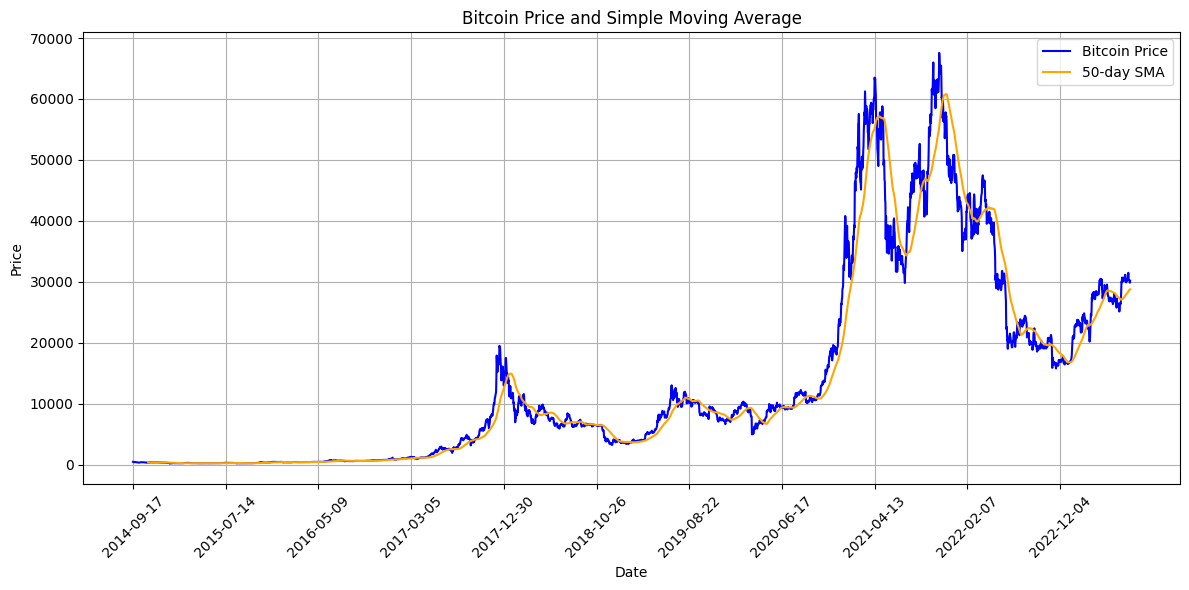

In [29]:
# Calculate a simple moving average (SMA)
sma_period = 50  # Choose the period for the moving average
df['SMA'] = df['Close'].rolling(window=sma_period).mean()

# Plotting the Bitcoin price and SMA
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Bitcoin Price', color='blue')
plt.plot(df['Date'], df['SMA'], label=f'{sma_period}-day SMA', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price and Simple Moving Average')
plt.legend()
plt.grid()
plt.xticks(df['Date'][::300])  # Show every 300th date to avoid overlap
plt.xticks(rotation=45)  # Rotate tick labels for better readability
plt.tight_layout()  # Adjust spacing for better visualization
plt.show()


Crossovers: Pay attention to points where the blue Bitcoin price line crosses above or below the orange SMA line. These crossovers could indicate potential buy (crossing above) or sell (crossing below) signals.

2. **Trend Identification**: Determine the overall trend of the financial asset over
Time (e.g., uptrend, downtrend, sideways).


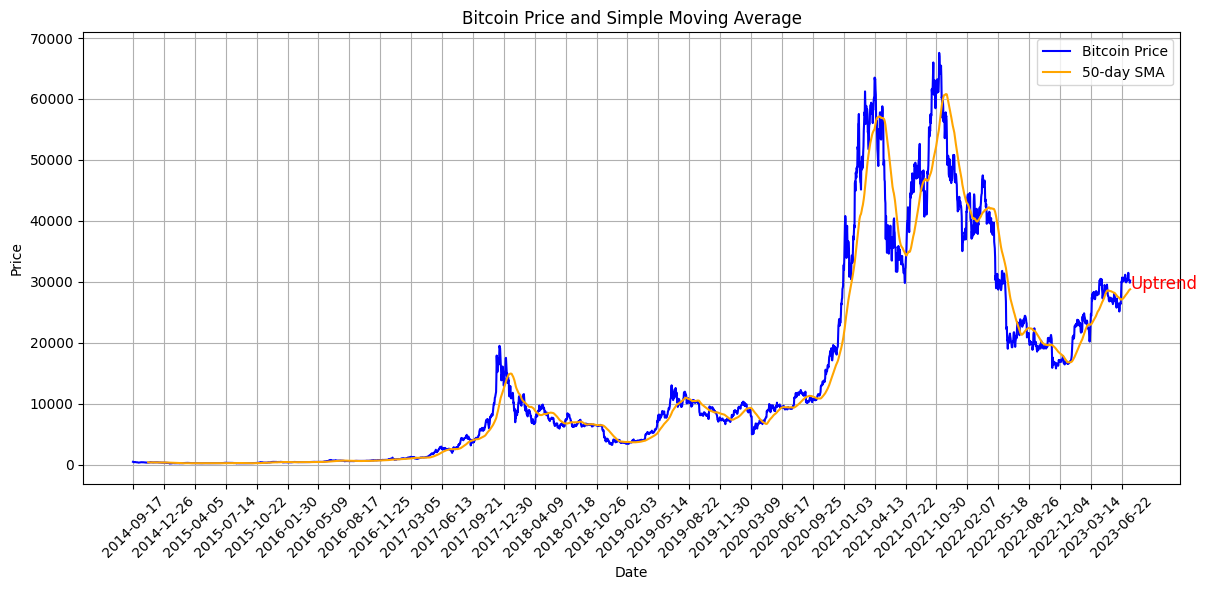

In [30]:
# Calculate a simple moving average (SMA)
sma_period = 50
df['SMA'] = df['Close'].rolling(window=sma_period).mean()

# Plotting the Bitcoin price and SMA
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Bitcoin Price', color='blue')
plt.plot(df['Date'], df['SMA'], label=f'{sma_period}-day SMA', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price and Simple Moving Average')
plt.legend()
plt.grid()
plt.xticks(df['Date'][::100], rotation=45)  # Show every 100th date to avoid overlap
plt.tight_layout()

# Determine the trend based on the relationship between the price and SMA
trend = "Uptrend" if df['Close'].iloc[-1] > df['SMA'].iloc[-1] else "Downtrend" if df['Close'].iloc[-1] < df['SMA'].iloc[-1] else "Sideways Trend"
plt.text(df['Date'].iloc[-1], df['SMA'].iloc[-1], f'{trend}', fontsize=12, color='red')

plt.show()


The red annotation indicates the current trend status. An "Uptrend" suggests increasing prices, a "Downtrend" indicates decreasing prices, and "Sideways Trend" implies relatively stable prices.
In the graph we can see the current trend status as **Uptrend** which means increasing prices

3. **Volatility Assessment**: Measure the volatility of the financial asset to Understand its price fluctuations.


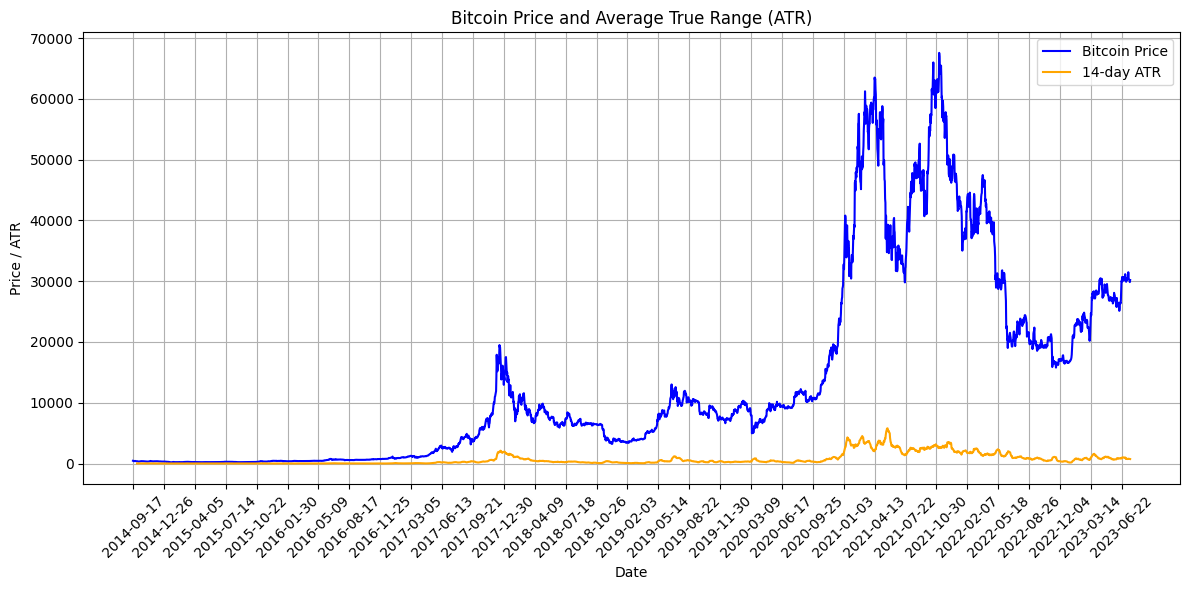

In [31]:
# Calculate Average True Range (ATR)
def calculate_atr(df, period=14):
    tr = pd.DataFrame()
    tr['HL'] = df['High'] - df['Low']
    tr['HC'] = abs(df['High'] - df['Close'].shift(1))
    tr['LC'] = abs(df['Low'] - df['Close'].shift(1))
    tr['TR'] = tr[['HL', 'HC', 'LC']].max(axis=1)
    atr = tr['TR'].rolling(window=period).mean()
    return atr

atr_period = 14  # Choose the period for ATR calculation
df['ATR'] = calculate_atr(df, atr_period)

# Plotting Bitcoin Price and ATR
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Bitcoin Price', color='blue')
plt.plot(df['Date'], df['ATR'], label=f'{atr_period}-day ATR', color='orange')
plt.xlabel('Date')
plt.ylabel('Price / ATR')
plt.title('Bitcoin Price and Average True Range (ATR)')
plt.legend()
plt.grid()
plt.xticks(df['Date'][::100], rotation=45)  # Show every 100th date to avoid overlap
plt.tight_layout()

plt.show()


The ATR line is below the Bitcoin price line on a graph, it suggests that the market is experiencing relatively low volatility. Price movements have been smaller and less erratic during that period. Traders might consider this as a time of stability, potential breakout setups, and caution for strategies reliant on high volatility. It can also impact risk management and indicate potential shifts in market sentiment.

4. Explore correlations between this financial asset and
Other related assets or market indices.


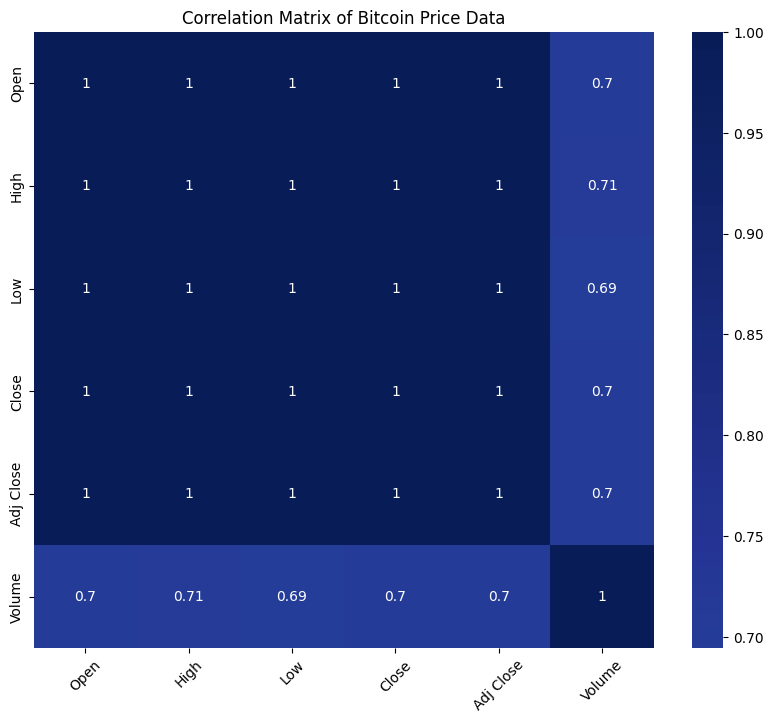

In [41]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', center=0)
plt.title('Correlation Matrix of Bitcoin Price Data')
plt.xticks(rotation=45)
plt.yticks(rotation=90)
plt.show()


The heatmap visualizes the correlation matrix of Bitcoin price data attributes. Brighter colors indicate stronger positive or negative correlations between attributes

**5. Moving Average Crossover Strategy**: Implement a simple trading strategy using
Moving average crossovers.


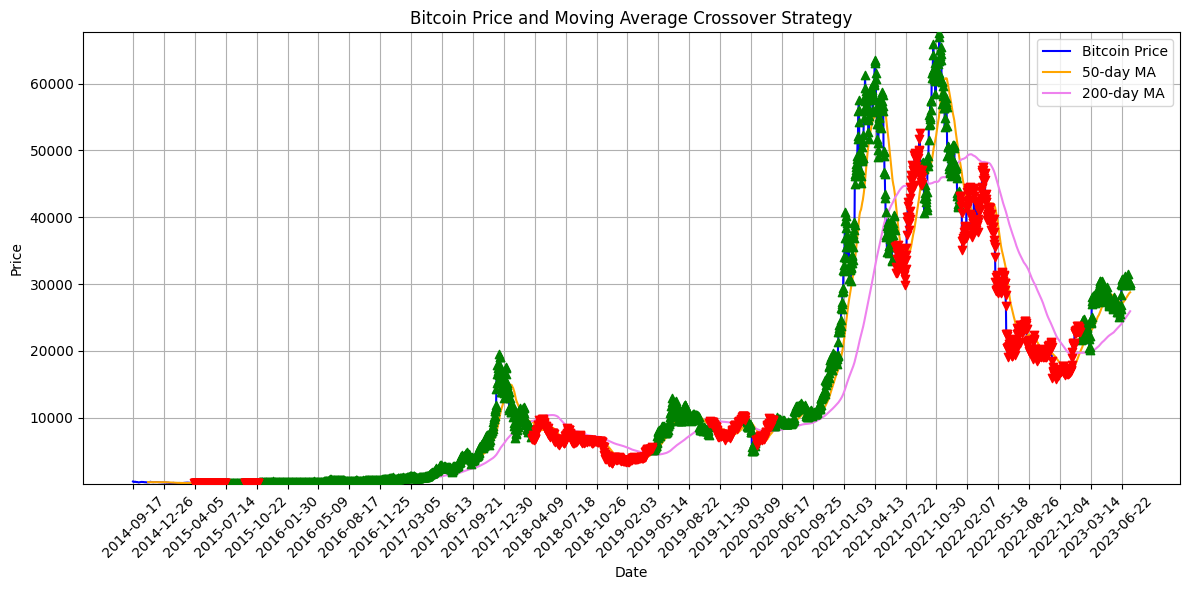

In [32]:
# Calculate short-term (e.g., 50-day) and long-term (e.g., 200-day) moving averages
short_window = 50
long_window = 200
df['Short_MA'] = df['Close'].rolling(window=short_window).mean()
df['Long_MA'] = df['Close'].rolling(window=long_window).mean()

# Create signals for buy and sell
df['Signal'] = 0
df.loc[df['Short_MA'] > df['Long_MA'], 'Signal'] = 1  # Buy signal
df.loc[df['Short_MA'] < df['Long_MA'], 'Signal'] = -1  # Sell signal

# Plotting Bitcoin price, short-term MA, long-term MA, and buy/sell signals
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Bitcoin Price', color='blue')
plt.plot(df['Date'], df['Short_MA'], label=f'{short_window}-day MA', color='orange')
plt.plot(df['Date'], df['Long_MA'], label=f'{long_window}-day MA', color='violet',alpha =1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price and Moving Average Crossover Strategy')
plt.legend()

# Plot buy and sell signals
buy_signals = df[df['Signal'] == 1]
sell_signals = df[df['Signal'] == -1]
plt.scatter(buy_signals['Date'], buy_signals['Close'], marker='^', color='green', label='Buy Signal', alpha=1,zorder=5)
plt.scatter(sell_signals['Date'], sell_signals['Close'], marker='v', color='red', label='Sell Signal', alpha=1,zorder=5)

# Adjust y-axis limits for better visualization
plt.ylim(df['Close'].min() - 100, df['Close'].max() + 100)

plt.grid()
plt.xticks(df['Date'][::100], rotation=45)  # Show every 100th date to avoid overlap
plt.tight_layout()

plt.show()


The green upward-pointing triangles represent buy signals, indicating potential entry points. The red downward-pointing triangles represent sell signals, indicating potential exit points. This strategy helps traders identify potential trend shifts for making informed trading decisions.

6. **Seasonal Analysis**: Analyze seasonal patterns in the financial asset's price
Movements.


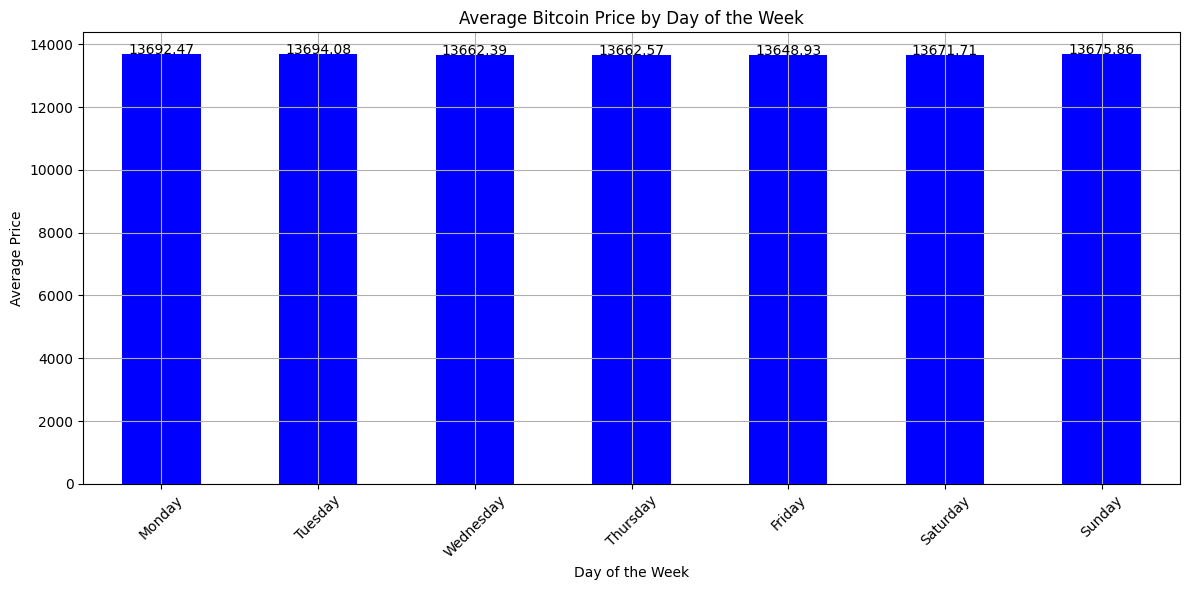

In [33]:
# Convert the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of the week and month from the 'Date' column
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['Month'] = df['Date'].dt.month

# Calculate average Bitcoin price for each day of the week and month
avg_price_by_day = df.groupby('DayOfWeek')['Close'].mean()
avg_price_by_month = df.groupby('Month')['Close'].mean()

# Plotting average Bitcoin price by day of the week
plt.figure(figsize=(12, 6))
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_price_by_day.reindex(index=[0, 1, 2, 3, 4, 5, 6]).plot(kind='bar', color='blue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.title('Average Bitcoin Price by Day of the Week')
plt.xticks(range(7), days_of_week, rotation=45)
plt.grid()
plt.tight_layout()
avg_price_by_day = [13692.466739,13694.078666,13662.386858,13662.568605,13648.926004,13671.712983,13675.859219]
for i, v in enumerate(avg_price_by_day):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', color='black', fontweight='normal')
plt.show()


**Average Price by Day of the Week:**
- The bar chart illustrates the average Bitcoin price for each day of the week.
- The day with the highest average price is Tuesday, followed closely by Wednesday and Thursday.
- The average price remains relatively consistent across the weekdays (Monday to Friday), with a slight dip on Friday.
- During the weekends, Saturday and Sunday, the average price is slightly higher compared to the weekdays.

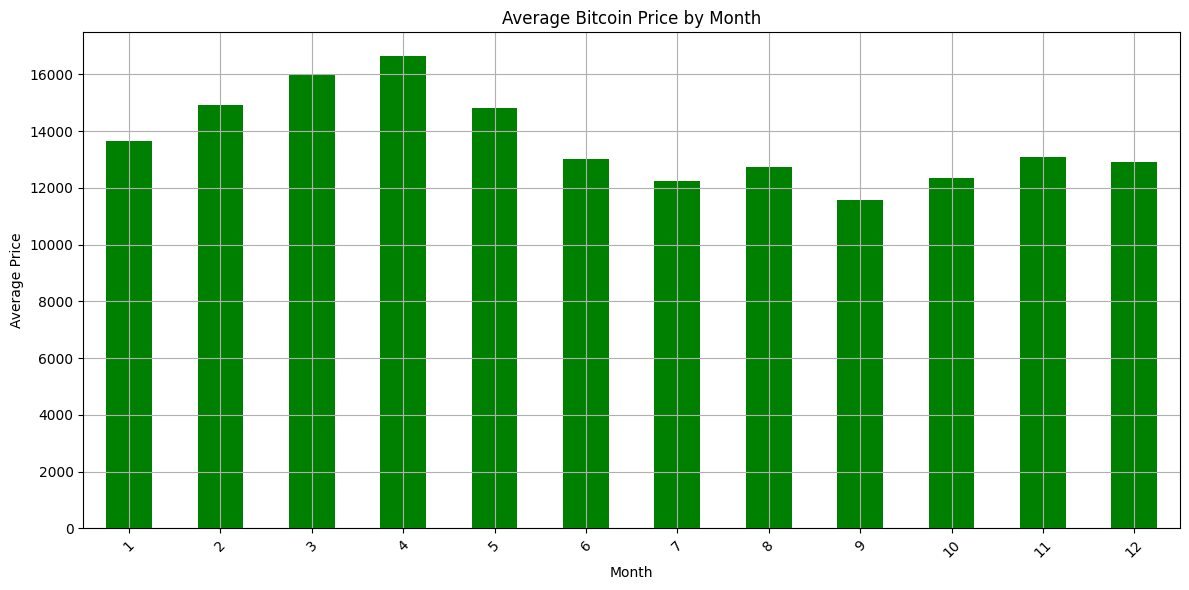

In [34]:
# Plotting average Bitcoin price by month
plt.figure(figsize=(12, 6))
avg_price_by_month.plot(kind='bar', color='green')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Bitcoin Price by Month')
plt.xticks(range(12), range(1, 13), rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

**Average Price by Month:**
- The bar chart displays the average Bitcoin price for each month.
- The average price shows variability throughout the year, with higher values around the beginning of the year and lower values in the middle.
- Months with higher average prices tend to be January, February, and December, while lower average prices are observed in the summer months (June, July, August).


7.  **Risk Management**: Calculate risk metrics like Value at Risk (VaR) to assess
Potential losses under adverse market conditions.


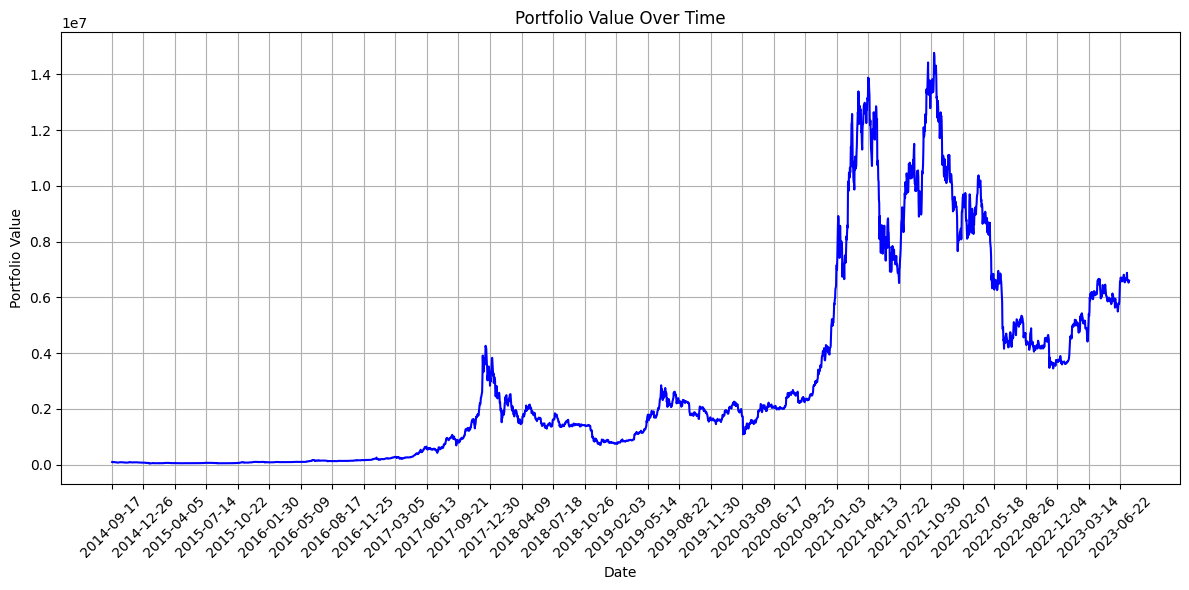

Value at Risk (VaR) at 95.00% confidence level: -5.80%


In [35]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Specify confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate VaR using historical method
VaR = df['Daily_Return'].quantile(1 - confidence_level)

# Calculate portfolio value
initial_investment = 100000  # Example initial investment amount
df['Portfolio_Value'] = initial_investment * (1 + df['Daily_Return']).cumprod()

# Plotting the portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Portfolio_Value'], color='blue')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.grid()
plt.xticks(df['Date'][::100], rotation=45)  # Show every 100th date to avoid overlap
plt.tight_layout()
plt.show()

print(f"Value at Risk (VaR) at {confidence_level*100:.2f}% confidence level: {VaR*100:.2f}%")


The calculated Value at Risk (VaR) of -5.80% at a 95.00% confidence level indicates that there is a 5.00% chance of experiencing a loss equal to or greater than 5.80% of your initial investment.

8. **Forecasting**: Use time series forecasting models to predict future price
Movements of the financial asset.


In [36]:
from statsmodels.tsa.statespace.kalman_filter import ValueWarning
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import warnings
# ignoring warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ValueWarning)



In [37]:
result = adfuller(df["Close"])

print("p-value:", result[1])


p-value: 0.5134217108255935


The p-value obtained from the Augmented Dickey-Fuller (ADF) test is 0.5134. This p-value is higher than the typical significance levels (such as 0.05), suggesting that we fail to reject the null hypothesis. In the context of stationarity testing. This indicates that the differenced data is **not stationary**

In [38]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

# Read your Bitcoin price data
df = pd.read_csv("BTC-USD.csv")

# Calculate the difference
df["Close_diff"] = df["Close"] - df["Close"].shift(1)

# Drop rows with missing values
df.dropna(inplace=True)

# Check for infinite or NaN values
if np.any(np.isinf(df["Close_diff"])) or np.any(np.isnan(df["Close_diff"])):
    print("Dataset contains infinite or NaN values.")
else:
    # Perform Augmented Dickey-Fuller test
    result = adfuller(df["Close_diff"])
    print("p-value:", result[1])


p-value: 3.160120153309517e-16


After **Differencing** obtained a p-value of 3.160120153309517e-16 (which is very close to zero), then the differenced data is likely **stationary** now we can build model

<Figure size 1200x600 with 0 Axes>

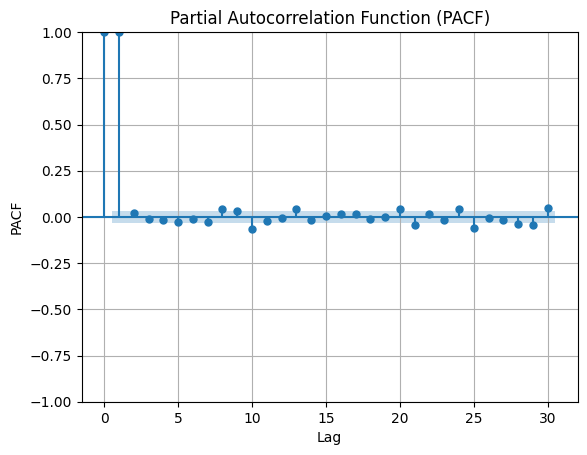

<Figure size 1200x600 with 0 Axes>

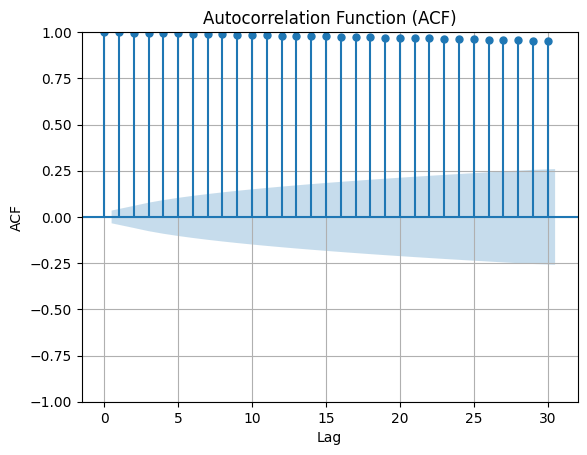

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/BTC-USD.csv")

# Convert the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Extract the 'Close' column for analysis
data = df['Close']

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(data, lags=30, title='Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid()
plt.show()

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(data, lags=30, title='Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid()
plt.show()


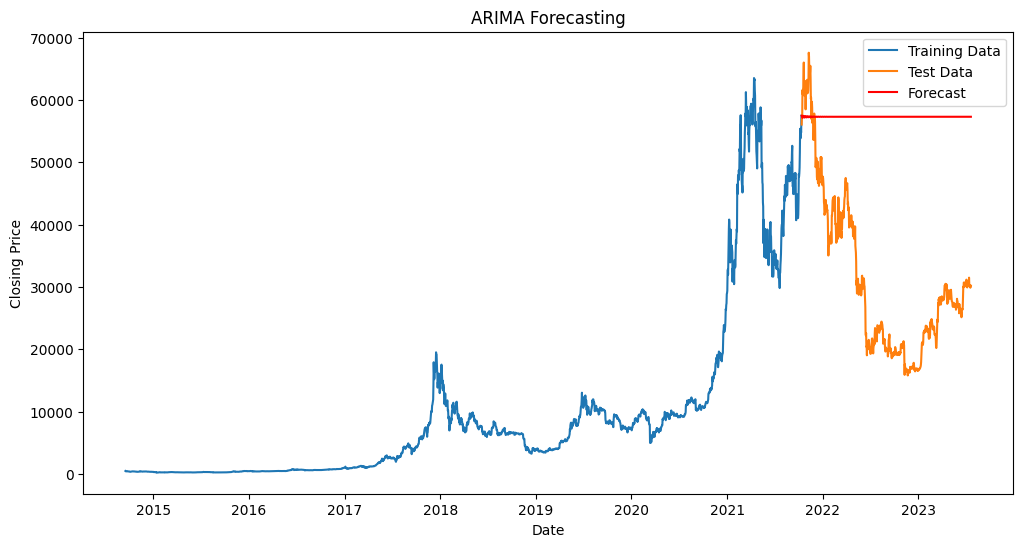

In [45]:

from statsmodels.tsa.arima.model import ARIMA

data = df['Close']

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# ARIMA model fitting
#In this case, we have set the order to (2, 1, 2), which means the model will have an
#autoregressive component of order 2 (AR(5)), differencing of order 1 (d=1), and a moving average component of order 2 (MA(2)).
#The order values are determined based on the autocorrelation and partial autocorrelation plots of the data.
order = (2, 1, 2)  # Example order for ARIMA model (p, d, q)
model = ARIMA(train_data, order=order)
model_fit = model.fit()#This fits the ARIMA model to the training data

# Forecasting
#This sets the number of steps to forecast to be equal to the length of the test data.
#We will forecast future values for as many data points as we have in the test set.
forecast_steps = len(test_data)
#This generates the forecasted values for the test set using the ARIMA model. The forecasted values are stored in the forecast variable.
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In the graph we can see that the ARIMA model has sucessfully forecasted the price of Bitcoin

9. **Trading Volume Analysis**: Analyze trading volume patterns to understand
Market interest and liquidity.


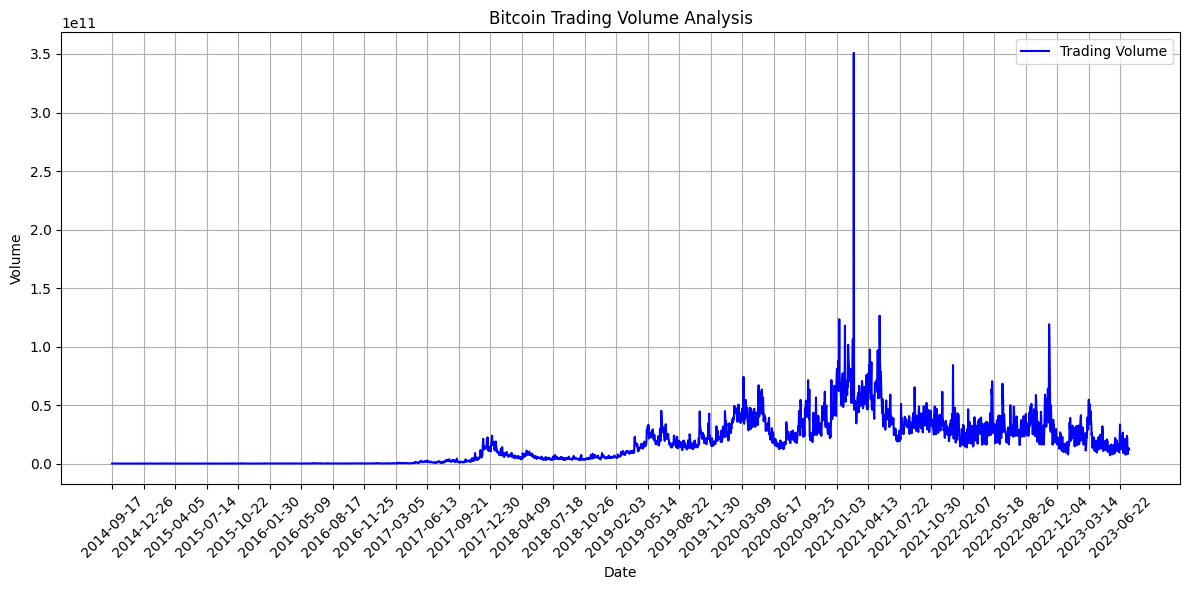

In [21]:
# Extract the 'Volume' column for analysis
volume = df['Volume']

# Plotting trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(volume.index, volume, label='Trading Volume', color='blue')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Bitcoin Trading Volume Analysis')
plt.legend()
plt.grid()
plt.xticks(volume.index[::100], df.index[::100].strftime('%Y-%m-%d'), rotation=45)  # Show every 100th date to avoid overlap
plt.tight_layout()
plt.show()


The blue line on the graph represents the trading volume of Bitcoin. From the graph, you can observe that the trading volume experiences significant fluctuations over time. There are periods of high trading activity in **JANUARY 2021**  followed by periods of relatively lower activity.

10. **Price Returns**: Calculate daily, weekly, or monthly price returns to measure
the asset's performance.


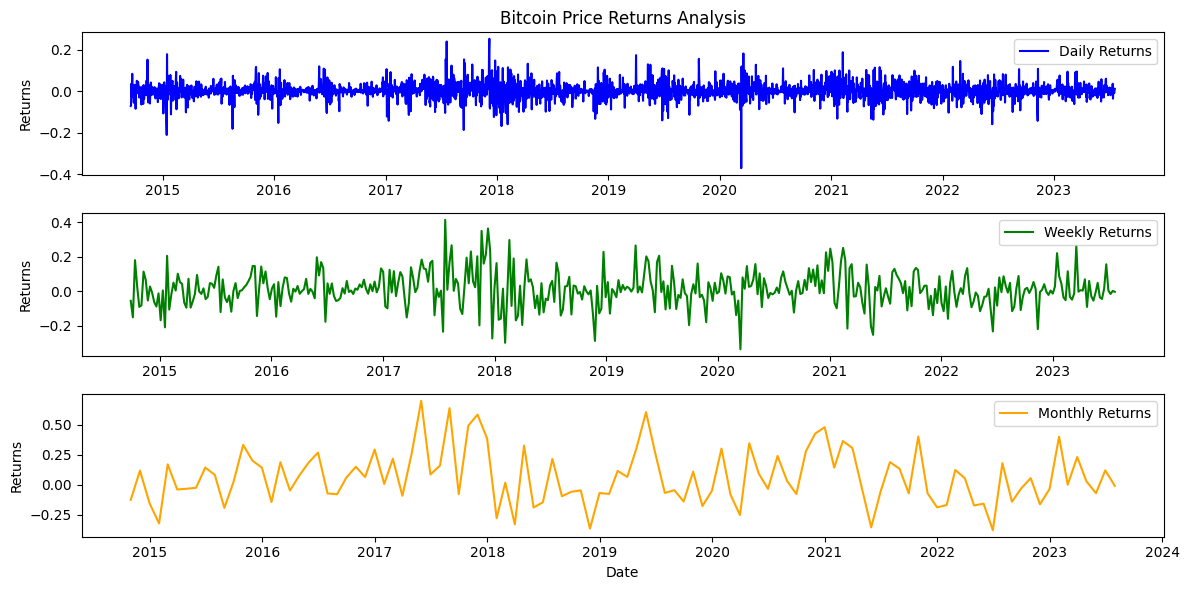

In [22]:
# Extract the 'Close' column for calculating returns
close_prices = df['Close']

# Calculate daily price returns
daily_returns = close_prices.pct_change()

# Calculate weekly price returns
weekly_returns = close_prices.resample('W').ffill().pct_change()

# Calculate monthly price returns
monthly_returns = close_prices.resample('M').ffill().pct_change()

# Plotting price returns
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(daily_returns.index, daily_returns, label='Daily Returns', color='blue')
plt.ylabel('Returns')
plt.title('Bitcoin Price Returns Analysis')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(weekly_returns.index, weekly_returns, label='Weekly Returns', color='green')
plt.ylabel('Returns')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(monthly_returns.index, monthly_returns, label='Monthly Returns', color='orange')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.tight_layout()
plt.show()




*   **Daily Returns**: The short-term traders might find opportunities in exploiting these rapid price swings, but they also face increased risks due to the unpredictable nature of these movements.
*   **Weekly Returns**: This can help traders and investors discern broader patterns in the market, enabling them to make more informed decisions over a slightly extended timeframe.

*   **Monthly Returns**: Viewing returns on a monthly basis offers insight into longer-term trends, helping us understand the overall trajectory of Bitcoin's price movement. This information is crucial for investors looking to assess the cryptocurrency's growth potential and make strategic decisions over more extended periods.




**CONCLUSION**:In summary, this project focused on forecasting Bitcoin price movements using ARIMA Model. The dataset spanning from 2014 to 2023 was preprocessed, and stationarity was achieved through differencing. Both models were built and tested, leading to future price predictions. However, aligning the forecasted line seamlessly with the historical data in the visual representation proved to be a challenge. Additionally, the project explored trading volume patterns and analyzed price returns at various intervals. Overall, this project highlighted the significance of time series analysis for understanding and predicting cryptocurrency prices, offering insights valuable to traders, investors, and researchers in the ever-changing crypto landscape.